In [1]:
using NetworkDiscovery
using POMDPs
using POMDPToolbox
using POMCP
rng = MersenneTwister(11);

In [14]:
p_intra = 0.3;
p_inter = 0.01;

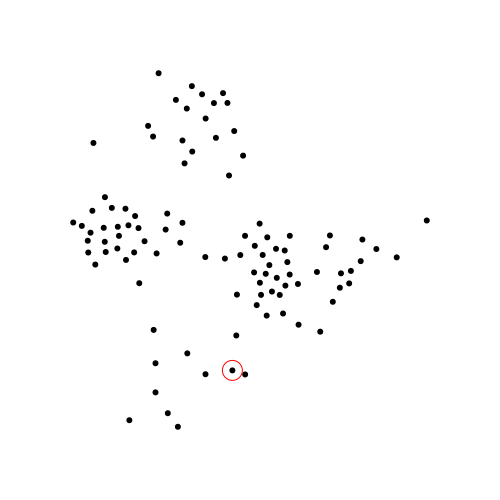

In [15]:
nw = generate_network(rng, 100, 5, p_intra, p_inter)

In [4]:
pomdp = generate_problem(rng, nw, 10, 1, 100.0, 10, 10, p_intra, p_inter)

CommunityAffiliationPOMDP(10,1,100.0,CommunityNetwork({100, 295} undirected graph,5,[3,3,5,4,2,2,3,4,5,1  …  5,5,4,2,1,1,3,2,3,1],10),Set{Int64}({2,85,60,55,58,19,51,37,72,5,38,45,97,12,1}),Set{Pair{Int64,Int64}}({edge 37 - 45,edge 51 - 97,edge 19 - 55,edge 2 - 12,edge 60 - 72,edge 5 - 85,edge 38 - 72,edge 1 - 58}),[37=>2,60=>3,58=>3,5=>2,38=>3,12=>3],0.2,0.02)

In [5]:
rollout_rng = MersenneTwister(3)
pomcp_rng = MersenneTwister(4)
rollout_policy = DiscoveryHeuristic(ProbeHighestDegree(true), GuessBasedOnNeighbors(rollout_rng))
solver = POMCPSolver(rollout_policy, 0.0, 100.0, 100, pomcp_rng, false, FullBeliefConverter(), 0)
policy = solve(solver, pomdp)

POMCPPolicy(CommunityAffiliationPOMDP(10,1,100.0,CommunityNetwork({100, 295} undirected graph,5,[3,3,5,4,2,2,3,4,5,1  …  5,5,4,2,1,1,3,2,3,1],10),Set{Int64}({2,85,60,55,58,19,51,37,72,5,38,45,97,12,1}),Set{Pair{Int64,Int64}}({edge 37 - 45,edge 51 - 97,edge 19 - 55,edge 2 - 12,edge 60 - 72,edge 5 - 85,edge 38 - 72,edge 1 - 58}),[37=>2,60=>3,58=>3,5=>2,38=>3,12=>3],0.2,0.02),POMCPSolver(DiscoveryHeuristic(ProbeHighestDegree(true),GuessBasedOnNeighbors(MersenneTwister(DSFMT_state(Int32[-1359582567,1073454075,1934390716,1073583786,-114685834,1073112842,-1913218479,1073122729,-73577195,1073266439  …  1226759590,1072980451,-1366384707,1073012992,1661148031,2121090155,141576524,-658637225,382,-1]),Uint32[0x00000003]))),0.0,100.0,100,MersenneTwister(DSFMT_state(Int32[-1125970028,1072950084,1987879523,1073737715,1318759160,1073082403,-665387610,1073002484,775432869,1072783382  …  -1193370493,1072918807,503071495,1073572056,-1375397214,586182507,2038247757,798803726,382,0]),Uint32[0x00000004]),f

In [6]:
revealed = initial_belief(pomdp)

RevealedGraph(Set{Pair{Int64,Int64}}({edge 37 - 45,edge 51 - 97,edge 19 - 55,edge 2 - 12,edge 60 - 72,edge 5 - 85,edge 38 - 72,edge 1 - 58}),[[58],[12],[],[],[85],[],[],[],[],[]  …  [],[],[],[],[],[],[51],[],[],[]],Set{Int64}({2,85,60,55,58,19,51,37,72,5,38,45,97,12,1}),[37=>2,60=>3,58=>3,5=>2,38=>3,12=>3],Set{Int64}({}),10,0.2,0.02,5)

In [7]:
# b = POMCPBeliefWrapper(revealed)
b = revealed
sim = HistoryRecorder(rng=rng, initial_state=nw, initial_belief=b)
simulate(sim, pomdp, policy)

0.0

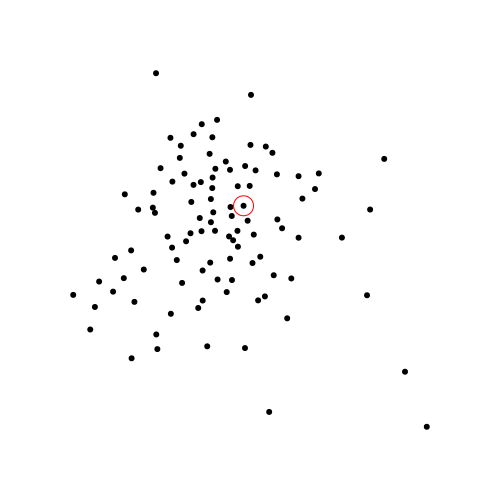

In [8]:
endnw = CommunityNetwork()
rand!(MersenneTwister(3), endnw, sim.belief_hist[end])
endnw

In [9]:
policy._tree_ref

RootNode(100,RevealedGraph(Set{Pair{Int64,Int64}}({edge 37 - 45,edge 51 - 97,edge 19 - 55,edge 2 - 12,edge 60 - 72,edge 5 - 85,edge 38 - 72,edge 1 - 58}),[[58,5,6,17,50,51,73,91,8,17  …  49,57,82,38,42,47,54,66,88,19],[12,19,42,59,73,87,93,72,5,37  …  28,31,45,46,52,61,79,29,50,64],[85,37,38],[5,58,51],[85,51,2,4,6,1,10,13,28,50  …  35,37,54,83,96,60,7,11,69,73],[51,5,1,19,19,85,58,55,72],[72,38,19,51,38,85,5],[37,1,45,60,55,55,37,37,12],[51,51,85,19,85],[51,5,37,72,97,97,55,2]  …  [51,1,45,85,60,12,37,72,38],[58,38,19],[2,55,19,60,37,55,97,60],[2,60,19,19,37],[58,12],[1,51,5,72,85,60,72,5,97],[51,16,22,36,48,52,59,69,72,60  …  93,98,10,15,49,56,69,77,96,45],[38,37,97],[38,85,85,2,12,85],[1,38,38,19]],Set{Int64}({2,85,60,55,58,19,51,37,72,5,38,45,97,12,1}),[37=>2,60=>3,58=>3,5=>2,38=>3,12=>3],Set{Int64}({}),10,0.2,0.02,5),[ProbeNode(55)=>ActNode(ProbeNode(55),6,16.666666666666668,RootNode(#= circular reference =#),{Neighborhood([12,21,32,42,62,66,77,83,90,19])=>ObsNode(Neighborhood([12,21,32,42,62,66,77,83,90,19]),1,RevealedGraph(Set{Pair{Int64,Int64}}({edge 55 - 62,edge 55 - 83,edge 38 - 72,edge 55 - 32,edge 55 - 66,edge 55 - 21,edge 55 - 90,edge 19 - 55,edge 60 - 72,edge 55 - 42,edge 55 - 12,edge 37 - 45,edge 55 - 77,edge 51 - 97,edge 2 - 12,edge 5 - 85,edge 1 - 58}),[[58,5,6,17,50,51,73,91,8,17  …  49,57,82,38,42,47,54,66,88,19],[12,19,42,59,73,87,93,72,5,37  …  28,31,45,46,52,61,79,29,50,64],[85,37,38],[5,58,51],[85,51,2,4,6,1,10,13,28,50  …  35,37,54,83,96,60,7,11,69,73],[51,5,1,19,19,85,58,55,72],[72,38,19,51,38,85,5],[37,1,45,60,55,55,37,37,12],[51,51,85,19,85],[51,5,37,72,97,97,55,2]  …  [51,1,45,85,60,12,37,72,38],[58,38,19],[2,55,19,60,37,55,97,60],[2,60,19,19,37],[58,12],[1,51,5,72,85,60,72,5,97],[51,16,22,36,48,52,59,69,72,60  …  93,98,10,15,49,56,69,77,96,45],[38,37,97],[38,85,85,2,12,85],[1,38,38,19]],Set{Int64}({32,77,2,62,21,85,60,55,42,58,66,19,83,51,37,72,5,38,90,45,97,12,1}),[37=>2,60=>3,58=>3,5=>2,38=>3,12=>3],Set{Int64}({55}),9,0.2,0.02,5),ActNode(#= circular reference =#),[ProbeNode(21)=>ActNode(ProbeNode(21),0,0.0,ObsNode(#= circular reference =#),Dict{Any,Any}()),ProbeNode(19)=>ActNode(ProbeNode(19),0,0.0,ObsNode(#= circular reference =#),Dict{Any,Any}()),ProbeNode(42)=>ActNode(ProbeNode(42),0,0.0,ObsNode(#= circular reference =#),Dict{Any,Any}()),ProbeNode(37)=>ActNode(ProbeNode(37),0,0.0,ObsNode(#= circular reference =#),Dict{Any,Any}()),ProbeNode(12)=>ActNode(ProbeNode(12),0,0.0,ObsNode(#= circular reference =#),Dict{Any,Any}()),ProbeNode(66)=>ActNode(ProbeNode(66),0,0.0,ObsNode(#= circular reference =#),Dict{Any,Any}()),ProbeNode(5)=>ActNode(ProbeNode(5),0,0.0,ObsNode(#= circular reference =#),Dict{Any,Any}()),ProbeNode(77)=>ActNode(ProbeNode(77),0,0.0,ObsNode(#= circular reference =#),Dict{Any,Any}()),ProbeNode(60)=>ActNode(ProbeNode(60),0,0.0,ObsNode(#= circular reference =#),Dict{Any,Any}()),ProbeNode(51)=>ActNode(ProbeNode(51),0,0.0,ObsNode(#= circular reference =#),Dict{Any,Any}()),ProbeNode(58)=>ActNode(ProbeNode(58),0,0.0,ObsNode(#= circular reference =#),Dict{Any,Any}()),ProbeNode(1)=>ActNode(ProbeNode(1),0,0.0,ObsNode(#= circular reference =#),Dict{Any,Any}()),ProbeNode(83)=>ActNode(ProbeNode(83),0,0.0,ObsNode(#= circular reference =#),Dict{Any,Any}()),ProbeNode(97)=>ActNode(ProbeNode(97),0,0.0,ObsNode(#= circular reference =#),Dict{Any,Any}()),ProbeNode(90)=>ActNode(ProbeNode(90),0,0.0,ObsNode(#= circular reference =#),Dict{Any,Any}()),ProbeNode(45)=>ActNode(ProbeNode(45),0,0.0,ObsNode(#= circular reference =#),Dict{Any,Any}()),ProbeNode(62)=>ActNode(ProbeNode(62),0,0.0,ObsNode(#= circular reference =#),Dict{Any,Any}()),ProbeNode(2)=>ActNode(ProbeNode(2),0,0.0,ObsNode(#= circular reference =#),Dict{Any,Any}()),ProbeNode(32)=>ActNode(ProbeNode(32),0,0.0,ObsNode(#= circular reference =#),Dict{Any,Any}()),ProbeNode(85)=>ActNode(ProbeNode(85),0,0.0,ObsNode(#= circular reference =#),Dict{Any,Any}()),ProbeNode(72)=>ActNode(ProbeNode(72),0,0.0,ObsNode(#= circular reference =#),Dict{Any,Any}()),Pr